In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
GPT_RESULTS_PATH = os.path.join("gpt", "results", "2023-07-03")
CS_RESULTS_PATH = os.path.join("results", "2023-07-04")

In [3]:
# plot number of files per directory in GPT_RESULTS_PATH
gpt_idiom_counts = {}
cs_idiom_counts = {}

# for each library in GPT_RESULTS_PATH
for dir in os.listdir(GPT_RESULTS_PATH):
    for subdir in os.listdir(os.path.join(GPT_RESULTS_PATH, dir)):
        gpt_idiom_counts[subdir] = len(os.listdir(os.path.join(GPT_RESULTS_PATH, dir, subdir)))

# sort counts by api (key)
gpt_idiom_counts = {k: v for k, v in sorted(gpt_idiom_counts.items(), key=lambda item: item[0])}

# for each library in CS_RESULTS_PATH
for dir in os.listdir(CS_RESULTS_PATH):
    if not os.path.isdir(os.path.join(CS_RESULTS_PATH, dir)):
        continue

    for subdir in os.listdir(os.path.join(CS_RESULTS_PATH, dir)):
        if cs_idiom_counts.get(subdir, None) is None:
            cs_idiom_counts[subdir] = 0

        for file in os.listdir(os.path.join(CS_RESULTS_PATH, dir, subdir, "idioms", "progs")):
            _, size, cluster, nhood_count, hole = file.split("_")
            hole = hole.split(".")[0]

            if int(hole) == 0 and int(nhood_count) > 0:
                cs_idiom_counts[subdir] = cs_idiom_counts.get(subdir, 0) + 1

# sort counts by api (key)
cs_idiom_counts = {k: v for k, v in sorted(cs_idiom_counts.items(), key=lambda item: item[0])}

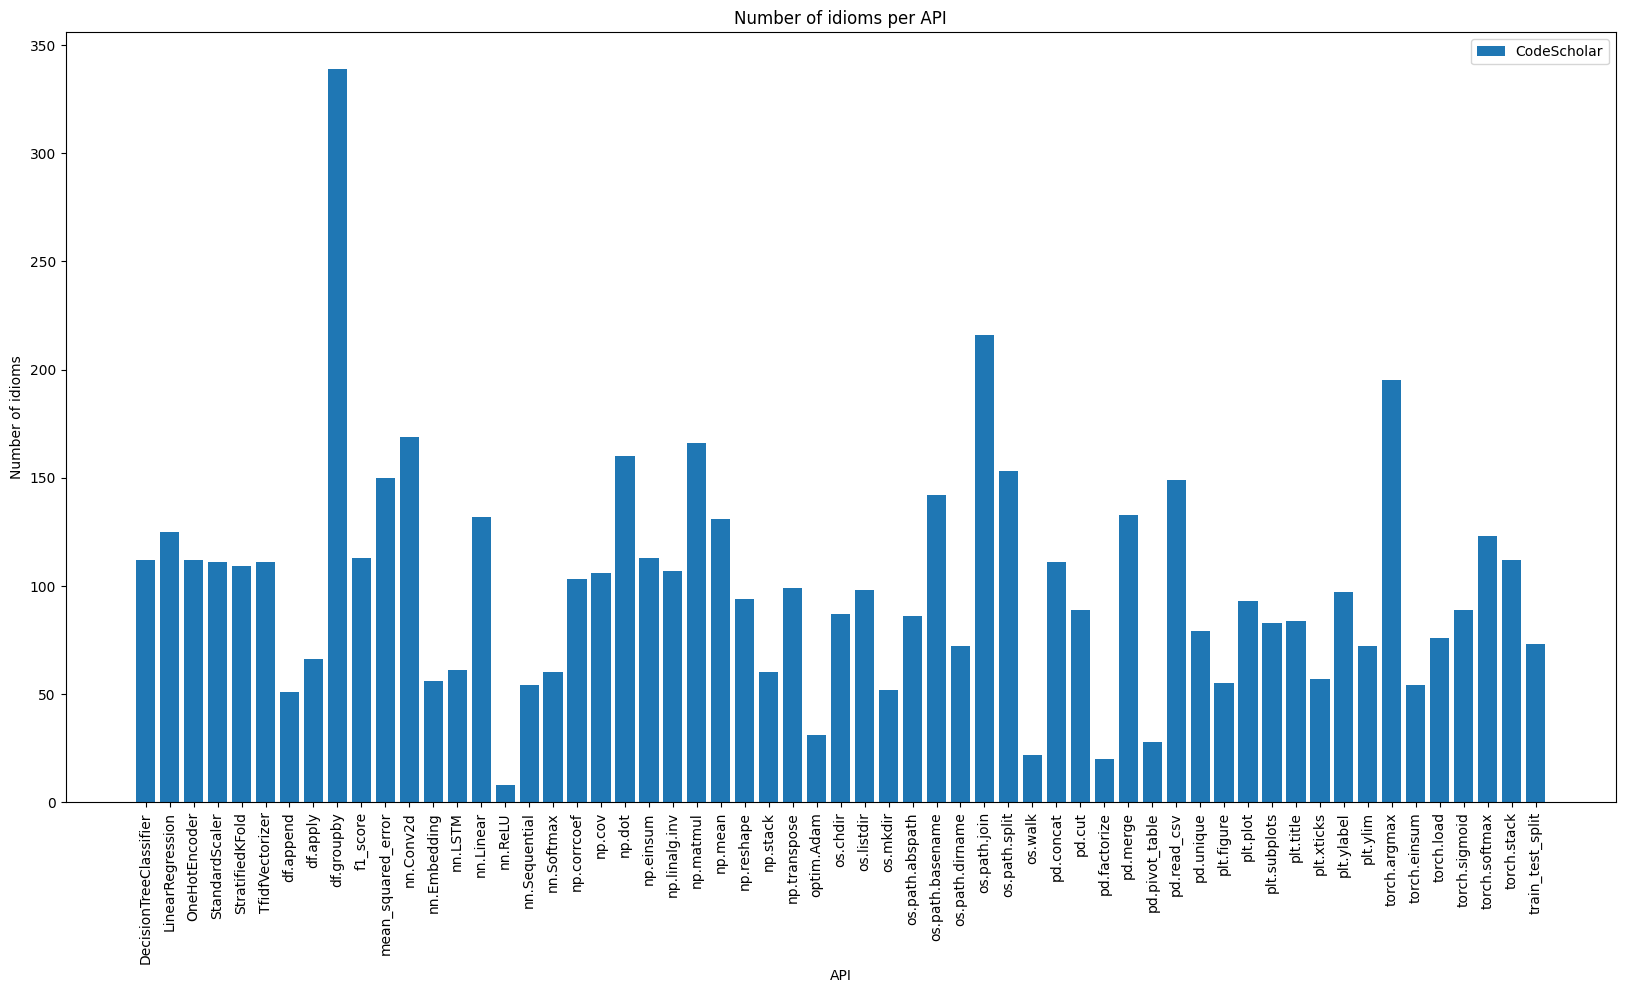

In [4]:
plt.figure(figsize=(20, 10))
plt.bar(cs_idiom_counts.keys(), cs_idiom_counts.values(), label="CodeScholar")
plt.xticks(rotation=90)
plt.xlabel("API")
plt.ylabel("Number of idioms")
plt.title("Number of idioms per API")
plt.legend()
plt.show()


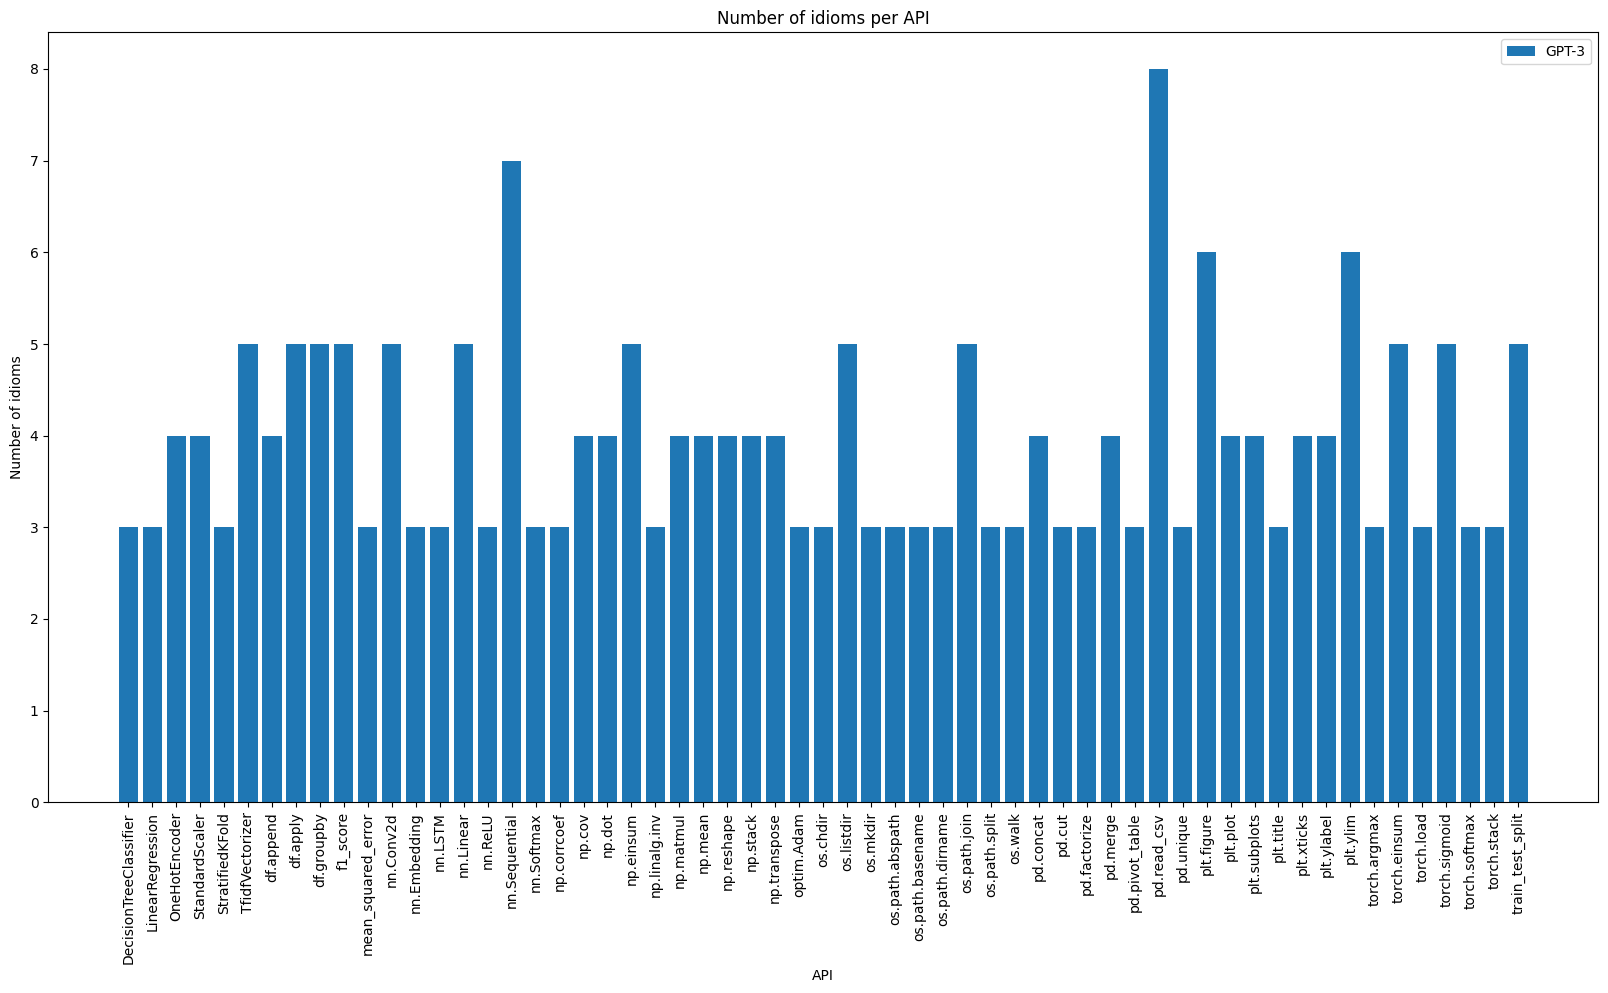

In [5]:
plt.figure(figsize=(20, 10))
plt.bar(gpt_idiom_counts.keys(), gpt_idiom_counts.values(), label="GPT-3")
plt.xticks(rotation=90)
plt.xlabel("API")
plt.ylabel("Number of idioms")
plt.title("Number of idioms per API")
plt.legend()
plt.show()

In [6]:
# read and parse /emd/emd.log file
# the format is:
# ========== [pandas: pd.read_csv] ==========
# Programs: 20000
# CS idioms: 149
# GPT idioms: 8
# CS EMD: 0.40105256416916146
# GPT EMD: 0.4697192690205559
# =====================================

import regex as re

def parse_emd_log(logs):
    emd = {}

    logs = re.findall(r"========== \[(.+): (.+)\] ==========\nPrograms: (.+)\nCS idioms: (.+)\nGPT idioms: (.+)\nCS EMD: (.+)\nGPT EMD: (.+)\n=====================================", logs)
    for log in logs:
        lib, api, n_progs, n_cs_idioms, n_gpt_idioms, cs_emd, gpt_emd = log
        emd[lib] = emd.get(lib, {})
        emd[lib][api] = (float(cs_emd), float(gpt_emd))

    return emd

In [7]:
emd = parse_emd_log(open(os.path.join("emd", "emd.log")).read())

In [13]:
def plot_emd_lib(lib, emd):
    # plt.figure(figsize=(20, 10))
    fig, ax = plt.subplots(layout='constrained')

    # plot cs emd
    plt.bar(emd[lib].keys(), [x[0] for x in emd[lib].values()], label="CodeScholar", width=0.25)

    # plot gpt emd with offset
    plt.bar([x + 0.25 for x in range(len(emd[lib]))], [x[1] for x in emd[lib].values()], label="GPT-3", width=0.25)

    plt.xticks(rotation=90)
    plt.xlabel("API")
    plt.ylabel("EMD")
    plt.title(f"EMD of {lib} idioms")
    plt.legend(loc='upper left', ncols=2)
    plt.show()


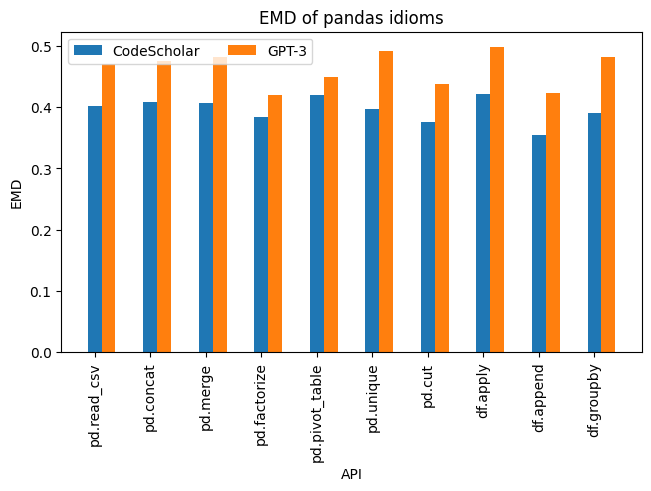

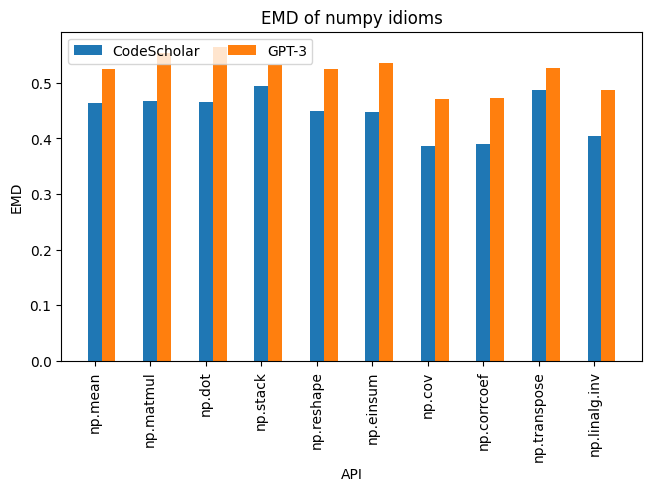

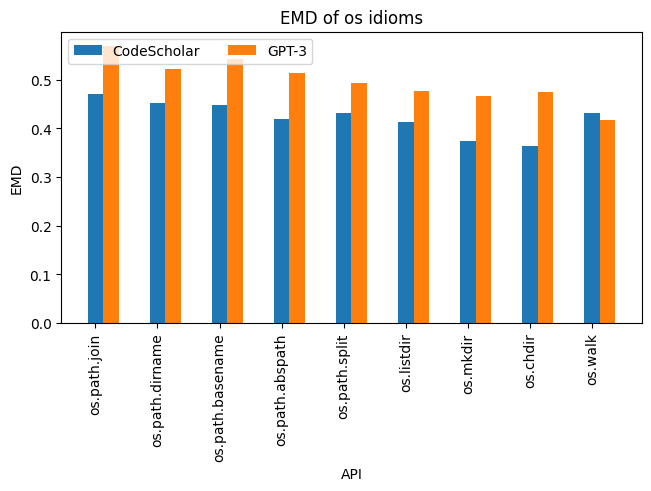

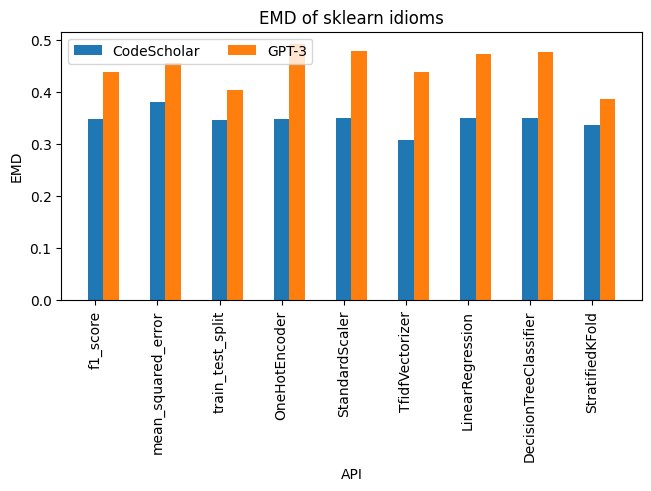

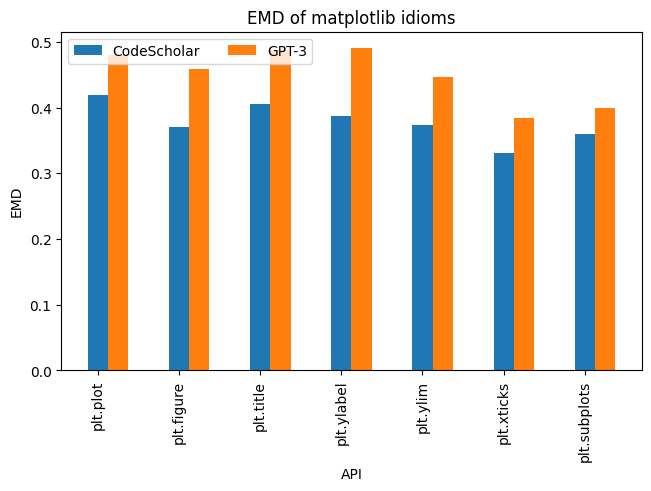

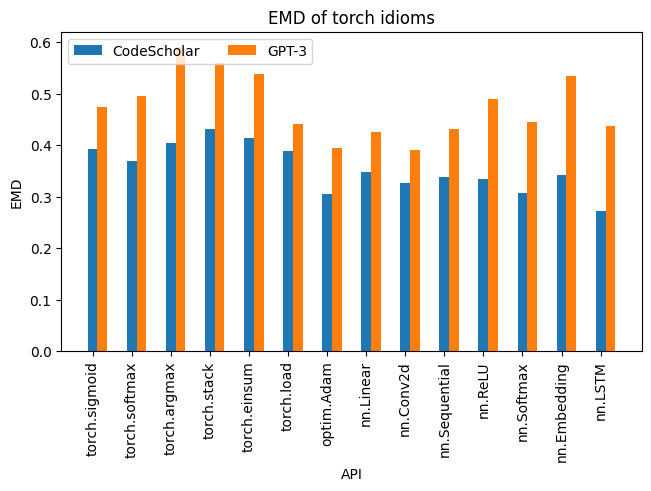

In [16]:
# plot emd for each library in a single plot
for lib in emd.keys():
    plot_emd_lib(lib, emd)

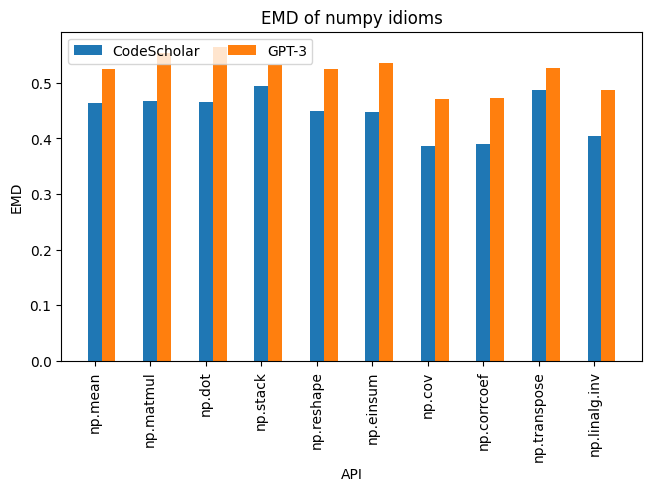

In [15]:
plot_emd_lib("numpy", emd)